In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [8]:
data.tail()

,Month,Sales
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413
104,1972-09-01,5877


In [7]:
data.Month = pd.to_datetime(data.Month,format="%Y-%m")

In [13]:
data.sort_values("Month",inplace=True)

In [14]:
data.dtypes

Month    datetime64[ns]
Sales             int64
dtype: object

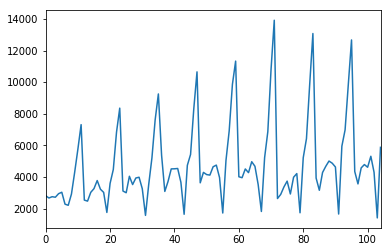

In [15]:
data.Sales.plot()

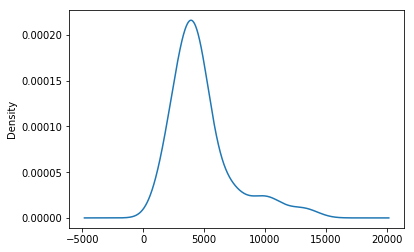

In [16]:
data.Sales.plot.density()

In [19]:
data.describe(include="all")

,Month,Sales
count,105,105.000000
unique,105,NaN
top,1968-05-01 00:00:00,NaN
freq,1,NaN
first,1964-01-01 00:00:00,NaN
last,1972-09-01 00:00:00,NaN
mean,NaN,4761.152381
std,NaN,2553.502601
min,NaN,1413.000000
25%,NaN,3113.000000


In [20]:
import statsmodels.tsa.seasonal as sm

In [22]:
data.set_index("Month",inplace=True)

In [24]:
result_add = sm.seasonal_decompose(data.Sales,model="additive")

In [25]:
result_mul = sm.seasonal_decompose(data.Sales,model="multiplicative")

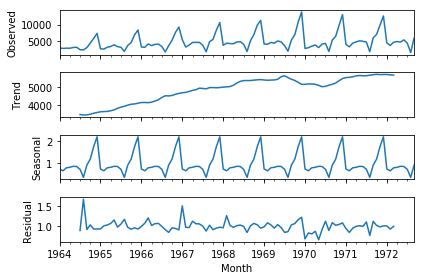

In [26]:
result_mul.plot()
plt.show()

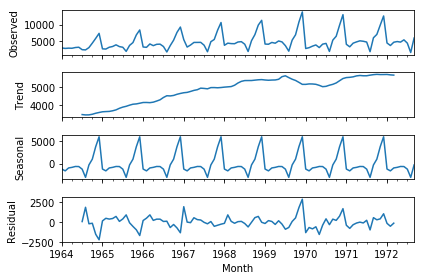

In [27]:
result_add.plot()
plt.show()

In [28]:
def mape(actual,predicted):
    return np.mean(np.abs(actual-predicted)/actual)

In [29]:
def symmetric_mape(actual,predicted):
    return np.mean(np.abs(actual-predicted)/((actual+predicted)/2))

In [30]:
from sklearn.metrics import mean_squared_error

In [33]:
act = np.array([1,2,3,4])
pred = np.array([3,2,1,4])

In [37]:
mape(act,pred)

0.6666666666666666

In [38]:
mape(pred,act)

0.6666666666666666